# Analysing the dataset : GOT_character_predictions

In [559]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split 
import numpy as np # mathematical essentials
import sklearn.linear_model 
import random            as rand                     # random number gen
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend                                 
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.tree import plot_tree                   # tree plots

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = './GOT_character_predictions.xlsx'

# reading the file into Python
got = pd.read_excel(file)

got.head(n=10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [511]:
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [512]:
got.isnull().sum(axis=0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [513]:
got.loc[:,'age'][got.loc[:,'age']<=0]

329          0.0
790          0.0
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64

In [514]:
# looping to detect features with missing values
for col in got:

    # creating columns with 1s if missing and 0 if not
    if got[col].isnull().astype(int).sum() > 0:
        got['m_'+col] = got[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
got[    ['m_title', 'm_culture', 'm_mother', 'm_father', 
         'm_heir', 'm_house','m_spouse', 'm_isAliveMother', 
         'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age' ]    ].sum(axis = 0)

m_title            1008
m_culture          1269
m_mother           1925
m_father           1920
m_heir             1923
m_house             427
m_spouse           1670
m_isAliveMother    1925
m_isAliveFather    1920
m_isAliveHeir      1923
m_isAliveSpouse    1670
m_age              1513
dtype: int64

I created new variables from those that had NaN values that correspond to missing values. I need to "clean" the dataset before starting creating training and testing sets.

In [515]:
got.isnull().sum(axis=0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
m_title                          0
m_culture                        0
m_dateOfBirth                    0
m_mother            

I created new variables from the one that had values equal to 0 which correspond to null values.

In [516]:
# counting the number of zeroes for 
numDeadRelations_zeroes   = len(got['numDeadRelations'][got['numDeadRelations']==0]) # numDeadRelations

## the table below has been coded for you ##

# printing a table of the results
print(f"""
                     No\t\tYes
                   ---------------------
numDeadRelations  | {numDeadRelations_zeroes}\t{len(got) - numDeadRelations_zeroes}
""")


                     No		Yes
                   ---------------------
numDeadRelations  | 1801	145



In [517]:
# placeholder variables
got['has_numDeadRelations'] = 0



for index, value in got.iterrows():
    

    # numDeadRelations
    if got.loc[index, 'numDeadRelations'] > 0:
        got.loc[index, 'has_numDeadRelations'] = 1


In [518]:
got.rename(columns={'S.No':'S_No'},inplace=True)

In [519]:
got_corr = got.corr(method='pearson').round(decimals=2)

got_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveHeir                   0.38
book4_A_Feast_For_Crows       0.27
isAliveFather                 0.20
isAliveSpouse                 0.17
m_age                         0.15
m_dateOfBirth                 0.15
m_isAliveFather               0.14
m_isAliveMother               0.14
m_father                      0.14
m_mother                      0.14
m_heir                        0.13
m_isAliveHeir                 0.13
age                           0.09
m_isAliveSpouse               0.05
m_spouse                      0.05
m_title                       0.04
m_culture                     0.04
m_house                       0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
isAliveMother                -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
dateOfBirth                  -0.09
S_No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity          

In [520]:
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

# Creating Training and Testing Sets and a Linear Regression

In [521]:
# declaring explanatory variables
got_data=got.drop('isAlive',axis=1)


# declaring response variable
got_target=got.loc[ : , "isAlive"]

I separated the dataset into two new variables between the variable Y, called the response variable, and the explanatory variables : respectively, got_target and got_data.

In [522]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [523]:
# printing candidate variable set
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [524]:
for val in got_data:
    print(f" {val} + ")

 S_No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 has_numDeadRelations + 


In [525]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~  S_No+ 
book1_A_Game_Of_Thrones + 
book2_A_Clash_Of_Kings +
 book4_A_Feast_For_Crows +    
 m_mother +  
 m_age + 
 has_numDeadRelations """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.484594
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.145     
Dependent Variable:   isAlive            AIC:                1713.0487 
Date:                 2021-12-05 17:26   BIC:                1756.7922 
No. Observations:     1751               Log-Likelihood:     -848.52   
Df Model:             7                  LL-Null:            -992.53   
Df Residuals:         1743               LLR p-value:        2.1845e-58
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -1.6911   0.6906 -2.4486 0.0143 -3.0447 -0.3375
S_No                    -0.0007   0.0001 -6.0112 0.0000 -0.0010 -0.0005
book1_A_Game_Of_Thrones -0.4655   0.1556 -2.9909 0.0028 -0.7705 -0.1604
book2_A_Clash_Of_Kings  -0.2749   0.1374 -2.0005 0.0454 -0.5442 -0.0056
book4_A_Feast_For_Crows  1.7786   0.1421 12.5204 0.0000  1.5002  2.0571
m_mother                 2.2896   0.6698  3.4184 0.0006  0.9769  3.6023
m_age                    0.7764   0.1508  5.1467 0.0000  0.4807  1.0720
has_numDeadRelations    -0.6223   0.2331 -2.6695 0.0076 -1.0792 -0.1654
=======================================================================

"""

In [526]:
for val in got_data:
    print(f" '{val}', ")

 'S_No', 
 'name', 
 'title', 
 'culture', 
 'dateOfBirth', 
 'mother', 
 'father', 
 'heir', 
 'house', 
 'spouse', 
 'book1_A_Game_Of_Thrones', 
 'book2_A_Clash_Of_Kings', 
 'book3_A_Storm_Of_Swords', 
 'book4_A_Feast_For_Crows', 
 'book5_A_Dance_with_Dragons', 
 'isAliveMother', 
 'isAliveFather', 
 'isAliveHeir', 
 'isAliveSpouse', 
 'isMarried', 
 'isNoble', 
 'age', 
 'numDeadRelations', 
 'popularity', 
 'm_title', 
 'm_culture', 
 'm_dateOfBirth', 
 'm_mother', 
 'm_father', 
 'm_heir', 
 'm_house', 
 'm_spouse', 
 'm_isAliveMother', 
 'm_isAliveFather', 
 'm_isAliveHeir', 
 'm_isAliveSpouse', 
 'm_age', 
 'has_numDeadRelations', 


In [527]:
# prepared explanatory variable dataset by dropping unwanted variables 
got_explanatory = got.drop(['isAlive', 
 'name', 
 'title', 
 'culture', 
 'dateOfBirth', 
 'mother', 
 'father', 
 'heir', 
 'house', 
 'spouse', 
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',  
 'book5_A_Dance_with_Dragons', 
 'isAliveMother', 
 'isAliveFather', 
 'isAliveHeir', 
 'isAliveSpouse', 
 'isMarried', 
 'isNoble', 
 'age', 
 'numDeadRelations', 
 'popularity', 
 'm_title', 
 'm_culture', 
 'm_dateOfBirth', 
 'm_father', 
 'm_heir', 
 'm_house', 
 'm_spouse', 
 'm_isAliveMother', 
 'm_isAliveFather', 
 'm_isAliveHeir', 
 'm_isAliveSpouse'], axis = 1)

# prepare response variable dataset

# prepare training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            got_explanatory,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)

# merging training data for statsmodels
got_train = pd.concat([X_train, y_train], axis = 1)

# checking the form of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")
print("""
____________________________________________________________"""
      )
# checking proportions of training and testing sets
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Training Data
-------------
X-side: (1751, 6)
y-side: (1751,)


Testing Data
------------
X-side: (195, 6)
y-side: (195,)


____________________________________________________________


Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



# Logistic Regression Model in scikit-learn

In [528]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['isAlive','S_No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 
                   'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 
                   'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 
                   'book5_A_Dance_with_Dragons', 'isMarried','isNoble', 'age', 'numDeadRelations', 
                   'popularity', 'm_title', 'm_culture','m_dateOfBirth','m_mother','m_father', 
                   'm_heir', 'm_house', 'm_spouse', 'm_age', 'has_numDeadRelations' ],
 

 # significant variables only (set 1)
 'logit_sig'    : ['S_No', 'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book4_A_Feast_For_Crows', 'm_mother', 'm_age', 
                   'has_numDeadRelations' ],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['S_No', 'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book4_A_Feast_For_Crows', 'm_isAliveMother', 'm_age', 
                   'has_numDeadRelations']

}

I chose this first model of significant variables because their P-values were less than 0.05 and their correlation with the Y variable was strong. 

Moreover, for my second model of significant variables, I chose to replace the variable 'm_mother' with the variable 'm_isAliveMother' because their correlation with the variable Y and their P-value were identical to those of m_mother. Thus the two variables are linked. 

In [529]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['isAlive', 'S_No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_age', 'has_numDeadRelations']


First Significant p-value Model:
--------------------------------
['S_No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book4_A_Feast_For_Crows', 'm_mother', 'm_age', 'has_numDeadRelations']


Second Significant p-value Model:
---------------------------------
['S_No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book4_A_Feast_For_Crows', 'm_isAliveMother', 'm_age', 'has_numDeadRelations']



In [530]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY LOGREG:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY LOGREG:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY LOGREG: 0.7761
Testing  ACCURACY LOGREG: 0.8615


In [531]:
# area under the roc curve (auc)
print('AUC Score ACCURACY LOGREG:',roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

AUC Score ACCURACY LOGREG: 0.7628


In [532]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 5
True Positives : 140



In [533]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.04)
('S_No', -0.0)
('book1_A_Game_Of_Thrones', -0.41)
('book2_A_Clash_Of_Kings', -0.24)
('book4_A_Feast_For_Crows', 1.76)
('m_mother', 0.58)
('m_age', 0.69)
('has_numDeadRelations', -0.89)


# Classification Trees (CART Models)

## Full Tree

This code has been retrived from Script 7 of Machine Learning

In [534]:
# plot_feature_importances

def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [535]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.7077
Full Tree AUC Score: 0.6659


In [536]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 36
True Positives : 109



## Pruned Tree

Since the Full Tree is a difficult method to read because of the multitudes of branches and leaves, I had to prune the model to facilitate the division of the data by the model.

According to your rules, the max_depth should be less than or equal to 8 so I used the max_depth and the min_samples_leaf that we chose in class. It means that I develop a tree with a maximum depth of 4 and a minimum number of samples per leaf of 25.

In [537]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 4,
                                    min_samples_leaf = 25,
                                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY PTree:', tree_pruned_fit.score(x_train,y_train).round(4))
print('Testing  ACCURACY PTree:', tree_pruned_fit.score(x_test,y_test).round(4))
print('AUC Score PTree        :', roc_auc_score(y_true  = y_test,y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train,y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test,y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY PTree: 0.7875
Testing  ACCURACY PTree: 0.8615
AUC Score PTree        : 0.7628


In [538]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 5
True Positives : 140



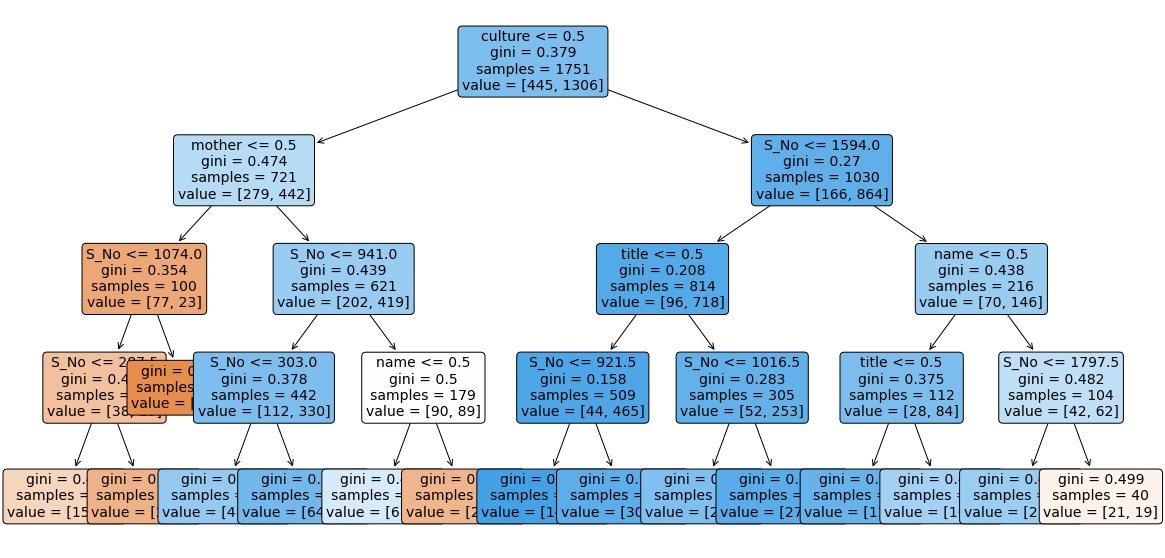

In [539]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned_fit, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

# Classification Modeling with KNN

This code has been retrieved from Script 7 of Machine Learning

In [540]:
# optimal_neighbors

def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

In [541]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY KNN:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY KNN:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score KNN        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY KNN: 0.7984
Testing  ACCURACY KNN: 0.8718
AUC Score KNN        : 0.8155


In [542]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 10
True Positives : 135



# Random Forest Classifier

## RandomForest 

In [543]:
# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


In [544]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [545]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY RF:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY RF:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score RF        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

# saving scoring data
rf_default_train_score = rf_default_fit.score(x_train, y_train).round(4)
rf_default_test_score  = rf_default_fit.score(x_test, y_test).round(4)


# saving AUC score
rf_default_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4)

Training ACCURACY RF: 0.7887
Testing  ACCURACY RF: 0.8308
AUC Score RF        : 0.67


In [546]:
# unpacking the confusion matrix
rf_default_tn, \
rf_default_fp, \
rf_default_fn, \
rf_default_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 0
True Positives : 145



## Tuned Forest 

After having executed a RandomForest model, I used RandomizedSearchCV to optimize my hyperparameters and have a new model: the Tuned Forest.

In [558]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 96,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 21, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.5181


In [548]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=21, random_state=219,
                       warm_start=True)

In [549]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 21,
                                      n_estimators     = 100,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.795
Forest Tuned Testing  ACCURACY: 0.8769
Forest Tuned AUC Score        : 0.76


In [550]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 0
True Positives : 145



# Gradient Boosting Classifier

## Full GBM

In [551]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

# saving scoring data for future use
full_gbm_default_train_score = full_gbm_default_fit.score(x_train, y_train).round(4) # accuracy
full_gbm_default_test_score  = full_gbm_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
full_gbm_default_auc = roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4) # auc

Training ACCURACY: 0.8247
Testing ACCURACY : 0.841
AUC Score        : 0.7424


In [552]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 27
False Positives: 23
False Negatives: 8
True Positives : 137



## Tuned GBM

After having executed a Gradient Boosting Classifier model, I used RandomizedSearchCV to optimize my hyperparameters and have a new model: the Tuned GBM.

In [553]:
# declaring a hyperparameter space
#learn_range        = np.arange(0.1, 2.2, 0.5)
#estimator_range    = np.arange(100, 501, 25)
#depth_range        = np.arange(2, 11, 2)
#warm_start_range   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_range,
              #'max_depth'     : depth_range,
              #'n_estimators'  : estimator_range,
              #'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           #param_distributions = param_grid,
                           #cv                  = 3,
                           #n_iter              = 500,
                           #random_state        = 219,
                           #scoring             = make_scorer(roc_auc_score,
                                                 #needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
##print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [554]:
#full_gbm_cv.best_estimator_

 Likewise, I put the two code cells, above, in blue because the time that you gave us to execute the whole code, is 240 seconds. Thus, as the execution of these codes exceeded this time limit, I preferred to show you the method that allowed me to have the parameters of the cell that follows.  

In [555]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 2.1,
                                       max_depth     = 6,
                                       n_estimators  = 175,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

# saving scoring data for future use
gbm_tuned_train_score = gbm_tuned_fit.score(x_train, y_train).round(4) # accuracy
gbm_tuned_test_score  = gbm_tuned_fit.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
gbm_tuned_auc = roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4) # auc

Training ACCURACY: 0.7207
Testing  ACCURACY: 0.7385
AUC Score        : 0.6669


In [556]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 27
True Positives : 118



# RESULTS

In [557]:
# comparing results
print(f"""
Model          Training Accuracy        Testing Accuracy          AUC Score      Confusion Matrix
------------   ------------------       ----------------          ---------      ----------------
Logistic        {logreg_train_score}                   {logreg_test_score}                   {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree       {full_tree_train_score}                      {full_tree_test_score}                   {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree     {pruned_tree_train_score}                   {pruned_tree_test_score}                   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
*KNN            {knn_train_score}                   {knn_test_score}                   {knn_auc_score}         {knn_tree_tn,knn_tree_fp, knn_tree_fn,knn_tree_tp}
RandomForest    {rf_default_train_score}                   {rf_default_test_score}                   {rf_default_auc_score}           {rf_default_tn,rf_default_fp, rf_default_fn,rf_default_tp}
Tuned Forest    {forest_tuned_train_score}                    {forest_tuned_test_score}                   {forest_tuned_auc}           {tuned_rf_tn,tuned_rf_fp,tuned_rf_fn,tuned_rf_tp}
Full GBM        {full_gbm_default_train_score}                   {full_gbm_default_test_score}                    {full_gbm_default_auc}         {gbm_default_tn,gbm_default_fp,gbm_default_fn,gbm_default_tp}
Tuned GBM       {gbm_tuned_train_score}                   {gbm_tuned_test_score}                   {gbm_tuned_auc}         {gbm_tuned_tn,gbm_tuned_fp,gbm_tuned_fn,gbm_tuned_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree', 'KNN','RandomForest',
                       'Tuned Forest','Full GBM','Tuned GBM'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score,
                   knn_auc_score,rf_default_auc_score, forest_tuned_auc,
                   full_gbm_default_auc,gbm_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score, knn_train_score,
                           rf_default_train_score, forest_tuned_train_score,
                           full_gbm_default_train_score,gbm_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score, knn_test_score, 
                           rf_default_test_score,forest_tuned_test_score,
                           full_gbm_default_test_score,gbm_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (knn_tree_tn,knn_tree_fp, knn_tree_fn,knn_tree_tp),
                           (rf_default_tn,rf_default_fp, rf_default_fn,rf_default_tp),
                           (tuned_rf_tn,tuned_rf_fp,tuned_rf_fn,tuned_rf_tp), 
                           (gbm_default_tn,gbm_default_fp,gbm_default_fn,gbm_default_tp),
                           (gbm_tuned_tn,gbm_tuned_fp,gbm_tuned_fn,gbm_tuned_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model          Training Accuracy        Testing Accuracy          AUC Score      Confusion Matrix
------------   ------------------       ----------------          ---------      ----------------
Logistic        0.7761                   0.8615                   0.7628         (28, 22, 5, 140)
Full Tree       1.0                      0.7077                   0.6659         (29, 21, 36, 109)
Pruned Tree     0.7875                   0.8615                   0.7628         (28, 22, 5, 140)
*KNN            0.7984                   0.8718                   0.8155         (35, 15, 10, 135)
RandomForest    0.7887                   0.8308                   0.67           (17, 33, 0, 145)
Tuned Forest    0.795                    0.8769                   0.76           (26, 24, 0, 145)
Full GBM        0.8247                   0.841                    0.7424         (27, 23, 8, 137)
Tuned GBM       0.7207                   0.7385                   0.6669         (26, 24, 27, 118)



Classification Modeling with KNN is the best model because it has a AUC score of 0.8155.